### Connecting

In [ ]:
#%connect(host=HOST,port=PORT,login=LOGIN,password=PASSWORD)

### Creating task _import_

In [21]:
#%task(name=import)
import pandas as pd
import bz2
from sklearn.datasets import load_boston
boston = load_boston()
dataframe_load = pd.DataFrame(boston.data)
dataframe_load.columns = boston.feature_names 
data_label = boston.target
dataframe = dataframe_load.assign(LABEL=data_label)

dataframe_json = dataframe.to_json(orient='split').encode()
compressed_data = bz2.compress(dataframe_json)
dataframe.head()

variables.put("dataframe_json", dataframe_json)
#result = dataframe_json

Changing script language to 'Python' ...
Done.


### Adding fork environment to _import_

In [4]:
#%fork_env(name=import,path=./fork_env.py)

Adding a fork environment to the proactive task...
Fork environment added to 'import'.


### Creating task _split_

In [5]:
#%task(name=split,dep=[import])
import pandas as pd
from sklearn.model_selection import train_test_split

dataframe_json = variables.get("dataframe_json")

dataframe = pd.read_json(dataframe_json, orient='split')
X_train, X_test = train_test_split(dataframe, test_size=30)

variables.put("X_train_json", X_train.to_json(orient='split').encode())
variables.put("X_test_json", X_test.to_json(orient='split').encode())

Creating a proactive 'Python' task...
Adding a selection script to the proactive task...
Task 'split' created.
Dependence 'import'==>'split' added.
Done.


### Adding fork environment to _split_

In [8]:
#%fork_env(name=split,path=./fork_env.py)

Adding a fork environment to the proactive task...
Fork environment added to 'split'.


### Creating task _train_

In [9]:
#%task(name=train,dep=[split])
from sklearn.linear_model import LinearRegression
import pandas as pd
import pickle
# Fit the model on 33%
columns="LABEL"

X_train = pd.read_json(variables.get("X_train_json"), orient='split')

dataframe_train = X_train.drop(columns, axis=1, inplace=False)
dataframe_label = X_train.filter(columns, axis=1)
model = LinearRegression()
model.fit(dataframe_train, dataframe_label)
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

variables.put("filename", filename)

Creating a proactive 'Python' task...
Adding a selection script to the proactive task...
Task 'train' created.
Dependence 'split'==>'train' added.
Done.


### Adding fork environment to _train_

In [10]:
#%fork_env(name=train,path=./fork_env.py)

Adding a fork environment to the proactive task...
Fork environment added to 'train'.


### Creating task _predict_

In [12]:
#%task(name=predict,dep=[train,split,kjhasdad])
# load the model from disk
import pandas as pd
import pickle

columns="LABEL"

X_test = pd.read_json(variables.get("X_test_json"), orient='split')

dataframe_test = X_test.drop(columns, axis=1, inplace=False)
dataframe_label = X_test.filter(columns, axis=1)
loaded_model = pickle.load(open(variables.get("filename"), 'rb'))
result = loaded_model.score(dataframe_test, dataframe_label)
print(result)

Changing script language to 'Python' ...
Dependence 'train'==>'predict' added.
Dependence 'split'==>'predict' added.
Done.


### Adding fork environment to _predict_

In [13]:
#%fork_env(name=predict,path=./fork_env.py)

Adding a fork environment to the proactive task...
Fork environment added to 'predict'.


### Plotting the job

Plotting...


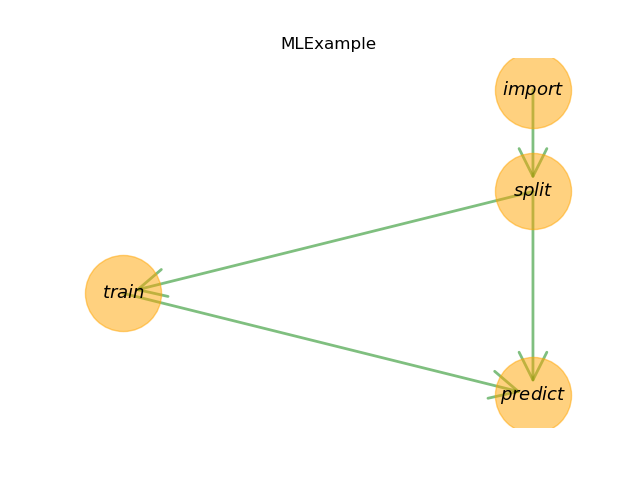

In [20]:
#%draw_job()

### Submitting the job to the scheduler

In [18]:
#%submit_job()

Creating a proactive job...
Job 'MLExample' created.
Adding the created tasks to 'MLExample' ...
Submitting the job to the proactive scheduler...
job_id: 123


## HELP!!! I forgot how to use get_result

In [28]:
#%help(pragma=get_result)

#%get_result(): gets and prints the job results
Usages:
   #%get_result(id=JOB_ID)


### Getting job results

In [19]:
#%get_result(id=123)

Getting job 123 output...
Result:
True
True
None
True